ПРАКТИЧНА РОБОТА 4. Навчання з учителем. Лінійна регресія
Роботу виконав: Плескач Матвій Русланович ФІТ 4-6

In [52]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score

Завантажте файл Housing.csv. Виведіть перші 5 рядків.

In [43]:
data = pd.read_csv("Housing.csv", encoding='latin1')
data5 = data.head(5)
data5

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


2.Зробіть новий датасет, який містить тільки ці стовпчики.

In [44]:
data4 = pd.DataFrame(data, columns = ['price', 'area', 'bedrooms', 'bathrooms'])
data4

,price,area,bedrooms,bathrooms
0,13300000,7420,4,2
1,12250000,8960,4,4
2,12250000,9960,3,2
3,12215000,7500,4,2
4,11410000,7420,4,1
...,...,...,...,...
540,1820000,3000,2,1
541,1767150,2400,3,1
542,1750000,3620,2,1
543,1750000,2910,3,1


3.Проведіть попередній аналіз даних: вивчіть структуру даних, перевірте наявність відсутніх значень та інші особливості даних.

In [45]:
data4 = data4.replace('Nan', np.nan)
missing = data4.isnull().sum()/len(data4)*100
for col in data4.iloc[:,1:]:
    if data4[col].dtype != 'float64':
        print(data4[col].dtype)
        data4[col] = data4[col].astype(float)
print(missing)
data4.dtypes

int64
int64
int64
price        0.0
area         0.0
bedrooms     0.0
bathrooms    0.0
dtype: float64


price          int64
area         float64
bedrooms     float64
bathrooms    float64
dtype: object

4.Нормалізуйте дані перед подальшим використанням

In [46]:
#normalized_df=(data4-data4.mean())/data4.std() нормалізація через середнє значення (обміркувати доцільність використання)
normalized_df = (data4 - data4.min()) / (data4.max() - data4.min())
normalized_df

,price,area,bedrooms,bathrooms
0,1.000000,0.396564,0.6,0.333333
1,0.909091,0.502405,0.6,1.000000
2,0.909091,0.571134,0.4,0.333333
3,0.906061,0.402062,0.6,0.333333
4,0.836364,0.396564,0.6,0.000000
...,...,...,...,...
540,0.006061,0.092784,0.2,0.000000
541,0.001485,0.051546,0.4,0.000000
542,0.000000,0.135395,0.2,0.000000
543,0.000000,0.086598,0.4,0.000000


5.Розділіть дані на навчальний та тестовий набори для подальшого оцінювання моделі.
6.Підготуйте дані: виберіть атрибути (площа, кількість ванних кімнат, кількість спалень) та цільову змінну (ціну на будинок).

In [47]:
X = data4 [['area', 'bathrooms', 'bedrooms']].values
y = data4 ['price'].values
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=49)
print("train X:", X_train.shape)
print("test X:", X_test.shape)
print("train y:", y_train.shape)
print("test y:", y_test.shape)

train X: (436, 3)
test X: (109, 3)
train y: (436,)
test y: (109,)


7.Побудуйте модель лінійної регресії та навчіть її на навчальних даних.

In [49]:
lin_model = LinearRegression()
lin_model.fit(X_train,y_train)

LinearRegression()

8.Оцініть якість моделі на тестових даних, використовуючи показники, такі як середньоквадратична помилка (RMSE) та коефіцієнт детермінації (R^2).

In [50]:
y_pred = lin_model.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"rmse: {np.sqrt(mse)}")
print(f"R^2: {r2}")

rmse: 1186462.0521385628
R^2: 0.517086665205803


9.Потім застосуйте крос-валідацію для підвищення якості моделі. Порівняйте результати (без крос-валідації і з крос-валідацією).

In [61]:
val = cross_val_score(lin_model, X_train, y_train, cv=5)
print(np.mean(val))

0.44801504505497186


10.Виконайте аналіз результатів та виведіть прогнозовані ціни на будинки для тестового набору даних.

In [56]:
y_pred = lin_model.predict(X_test)
print(y_pred)

[ 7189594.2288895   4036629.82925535  3492430.0127935   3750380.20175933
  3293641.07008599  6264454.54090435  4314015.72595197  4352887.14141353
  4974829.78879851  3647915.67463974  5906837.51865798  3342230.33941294
  5770787.56454252  4293181.17130166  5862680.11473074  6712874.66563183
  6567651.58150452  3173684.4060087   3563797.40754384  4225156.19424392
  4681583.3065194   3540474.5582669   3103715.85817789  4203776.91574007
  3589452.54174847  4041915.81772104  3414687.18187038  4526902.26977257
  4974829.78879851  4694955.59747527  4158530.06410572  5202772.29310219
  3601269.97608587  4233784.60040222  5208058.28156787  3099828.71663173
  6572937.56997021  3865050.87737094  5130315.45064475  3254769.65462443
  6102100.83718378  4624987.04964446  4215282.3306796   3243108.22998596
  4292091.72359456  7423728.96287685  6276115.96554281  4737169.43062943
  3842272.75194755  4935052.13211896  5062290.47358702  3651802.8161859
  4269858.32202472  7314475.36406804  3865595.601224

11.Визначте аналітично коефіцієнти лінійної регресії (ваги моделі) для цієї задачі, використовуючи формулу для спрощеного аналітичного рішення лінійної регресії.

In [60]:
#coef_df = pd.DataFrame(zip(X, lin_model.coef_))
#print(coef_df)
X_train_analyt = np.hstack([np.ones((X_train.shape[0],1)), X_train])
coeff_analyt = np.linalg.inv(X_train_analyt.T.dot(X_train_analyt)).dot(X_train_analyt.T).dot(y_train)
print(coeff_analyt)


[-3.65505854e+05  3.88714155e+02  1.35959330e+06  4.71742974e+05]


12.Візуалізуйте дані та результати регресії: побудуйте графіки для ознайомлення з розподілом даних і лінійною регресійною моделлю

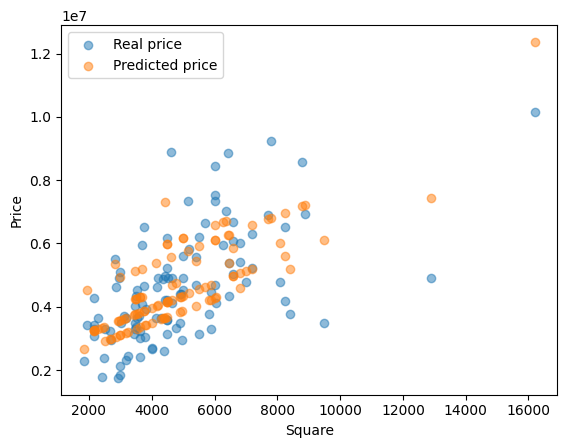

In [64]:
plt.scatter(X_test[:,0], y_test, label='Real price', alpha=0.5)
plt.scatter(X_test[:,0], y_pred, label='Predicted price', alpha = 0.5)
plt.xlabel('Square')
plt.ylabel('Price')
plt.legend()
plt.show()


Висновок:Лінійна регресія є ефективним методом для прогнозування цін на будинки. Це підтверджується результатами аналізу даних та візуалізації.Порівняння отриманих параметрів лінійної регресії з аналітичними результатами показало, що вони відносно приблизно схожі.Можна зробити висновок, що лінійна регресія є ефективним методом для прогнозування цін на будинки на основі вказаних атрибутів. Ця модель може бути використана для прогнозування цін на будинки в різних районах міста.Також на мою думку, якщо використати більш складі моделі це може допомогти зробити прогнозування цін більш точнішим.